In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/raw/country_notes.csv')
df.head()

,Country,Perfume Count,Note,Note Count
0,USA,1438,Amyris,9
1,USA,1438,Bergamot,200
2,USA,1438,Bitter orange,14
3,USA,1438,Cedar,65
4,USA,1438,Clary sage,16


# Data Cleaning

In [4]:
# Checks for missing values
missing_values = df.isnull().sum()

# Checks for duplicate rows
duplicate_rows = df.duplicated().sum()

# Checks for inconsistencies between Perfume Count and Note Count
inconsistent_rows = (df['Note Count'] > df['Perfume Count']).sum()

# Checks data types for each column
data_types = df.dtypes

# Filters out rows where 'Country' is "Unknown"
df_clean = df[df['Country'] != 'Unknown']

print(missing_values, duplicate_rows, inconsistent_rows, data_types)

df_clean.head()

Country          0
Perfume Count    0
Note             0
Note Count       0
dtype: int64 0 0 Country          object
Perfume Count     int64
Note             object
Note Count        int64
dtype: object


,Country,Perfume Count,Note,Note Count
0,USA,1438,Amyris,9
1,USA,1438,Bergamot,200
2,USA,1438,Bitter orange,14
3,USA,1438,Cedar,65
4,USA,1438,Clary sage,16


# Geospatial Data

In [5]:
# https://datahub.io/core/geo-countries#python

from datapackage import Package

package = Package('https://datahub.io/core/geo-countries/datapackage.json')

# Prints list of all resources
print(package.resource_names)

# Prints processed tabular data (if exists any)
for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        print(resource.read())

['validation_report', 'geo-countries_zip', 'countries']


In [15]:
import geopandas as gpd

# Loads the GeoJSON data into a GeoDataFrame
geojson_url = None
for resource in package.resources:
    if resource.descriptor['format'] == 'geojson':
        geojson_url = resource.descriptor['path']

gdf = gpd.read_file(geojson_url)

print(gdf.head())

         ADMIN ISO_A3                                           geometry
0        Aruba    ABW  POLYGON ((-69.99694 12.57758, -69.93639 12.531...
1  Afghanistan    AFG  POLYGON ((71.04980 38.40866, 71.05714 38.40903...
2       Angola    AGO  MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...
3     Anguilla    AIA  MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ...
4      Albania    ALB  POLYGON ((19.74777 42.57890, 19.74601 42.57993...


<Axes: >

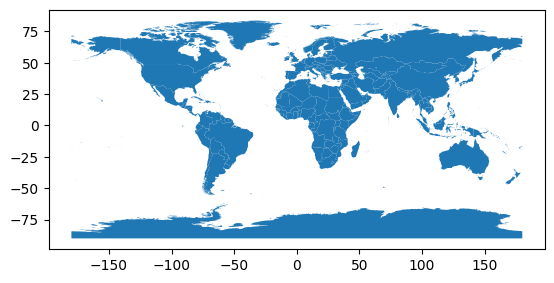

In [19]:
gdf.plot()